<a href="https://colab.research.google.com/github/crudables/ARU/blob/main/_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [202]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import QuantileTransformer,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [203]:
# read data from csv file on google drive
diabetes = (pd.read_csv('/content/drive/MyDrive/dataset/diabetes-1.csv')
  .rename(columns = str.lower)
)

In [204]:
# view the first 5 row
diabetes.head(5)

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [205]:
# view the last 5 rows
diabetes.tail()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [206]:
# view number of rows and columns of the dataset
diabetes.shape

(768, 9)

In [207]:
# get a summary of the data
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
bloodpressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skinthickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
diabetespedigreefunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


The result from the diabetes.describe() is a summary statistic of the dataset.
Among others, we can deduce the following:



1.   75% had between 0-6 pregnancies compared to 50%  
with 0-3 pregancies.
2.   The minimum age is 21, the maximum is 81 while the mean is 33.





In [208]:
# check 5 randomly selected rows
diabetes.sample(5)

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
126,3,120,70,30,135,42.9,0.452,30,0
90,1,80,55,0,0,19.1,0.258,21,0
495,6,166,74,0,0,26.6,0.304,66,0
731,8,120,86,0,0,28.4,0.259,22,1
4,0,137,40,35,168,43.1,2.288,33,1


In [209]:
#check for null values and data types
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Of the 9 variables of the dataset only bmi and diabetespedigreefunction are float with the rest being integers.
Also, there are no null values in the dataset.

In [210]:
# find the total of duplicate rows
diabetes.duplicated().sum()

0

In [211]:
# list the columns that have 0 as a value
diabetes.eq(0).columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [212]:
# Exploratory Data Analysis

In [213]:
# pregnancies column

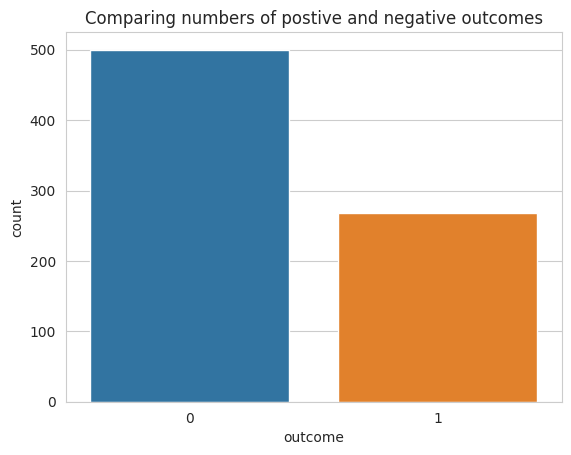

In [214]:
# check for equal representation in the dataset
sns.countplot(data=diabetes,x='outcome');
plt.title('Comparing numbers of postive and negative outcomes');

The above bar chart shows that there are about 500 of the individuals have an outcome of 0, meaning negative while about 300 have outcome 1, positive.


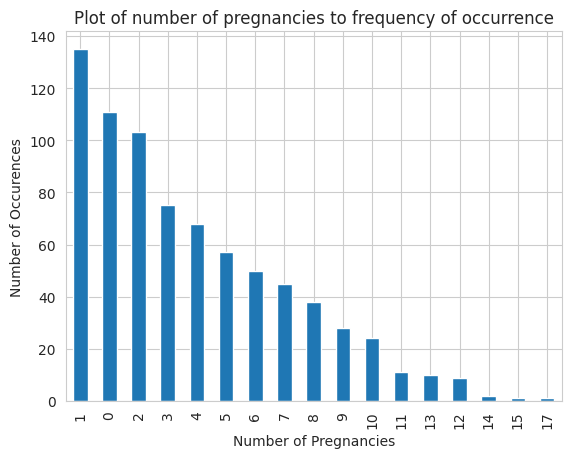

In [215]:
diabetes.pregnancies.value_counts().plot(kind='bar');
plt.xlabel('Number of Pregnancies',)
plt.ylabel('Number of Occurences')
plt.title('Plot of number of pregnancies to frequency of occurrence')
plt.xticks(rotation=90);

The chart shows the number of pregnancies had by individuals and the frequency of the number.
The chart was arranged in descending order of occurrence.

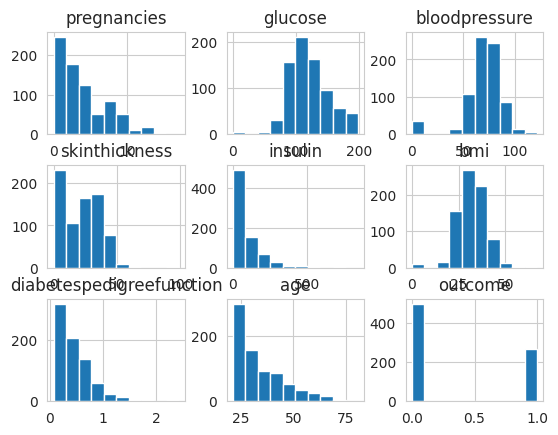

In [216]:
diabetes.hist();

The above historgrams show the variables with varying amount of skewedness. All the variables(except outcome) appears to be skewed to the right. Taking pregnancies for instance, it means that the frequency of people with higher number of pregnancy is reducing as we move to the right. 


In [217]:
# print the skew of the variables
for i in diabetes.columns:
  print(f' skew for {i} column is {diabetes[i].skew():.2} ')

 skew for pregnancies column is 0.9 
 skew for glucose column is 0.17 
 skew for bloodpressure column is -1.8 
 skew for skinthickness column is 0.11 
 skew for insulin column is 2.3 
 skew for bmi column is -0.43 
 skew for diabetespedigreefunction column is 1.9 
 skew for age column is 1.1 
 skew for outcome column is 0.64 


In [218]:
# 0 values in pregancies and outcome are not replaced
# replace 0 in the variables with strategy based on the skew value.
# replace glucose and skinthickness with mean
# replace bloodpressure,insulin,diabetespedigreefunction,age and bmi with median
def replace_zero(variable,strategy):
  # if strategy is mean, replace 0 with mean of column
  if strategy == 'mean':
    diabetes[variable] = diabetes[variable].mask(diabetes[variable].eq(0),diabetes[variable].mean())
    # if strategy is median, replace 0 with median of column
  elif strategy == 'median':
    diabetes[variable] = diabetes[variable].mask(diabetes[variable].eq(0),diabetes[variable].median())
    # Any other value of stragety returns the message
  else:
    print('Please provide the right strategy')

    # columns to replace 0 with mean
columns = ['glucose','skinthickness']

for i in columns:
  replace_zero(i,'mean')

# columns to replace 0 with median
columns = ['bloodpressure','insulin','diabetespedigreefunction','age','bmi']

for i in columns:
  replace_zero(i,'median')
  
# loop through 2nd to 8th column to check for 0 values
for i in diabetes.columns[1:-1]:
  print(f'{i} has {diabetes[i].eq(0).sum()} zero values')

glucose has 0 zero values
bloodpressure has 0 zero values
skinthickness has 0 zero values
insulin has 0 zero values
bmi has 0 zero values
diabetespedigreefunction has 0 zero values
age has 0 zero values


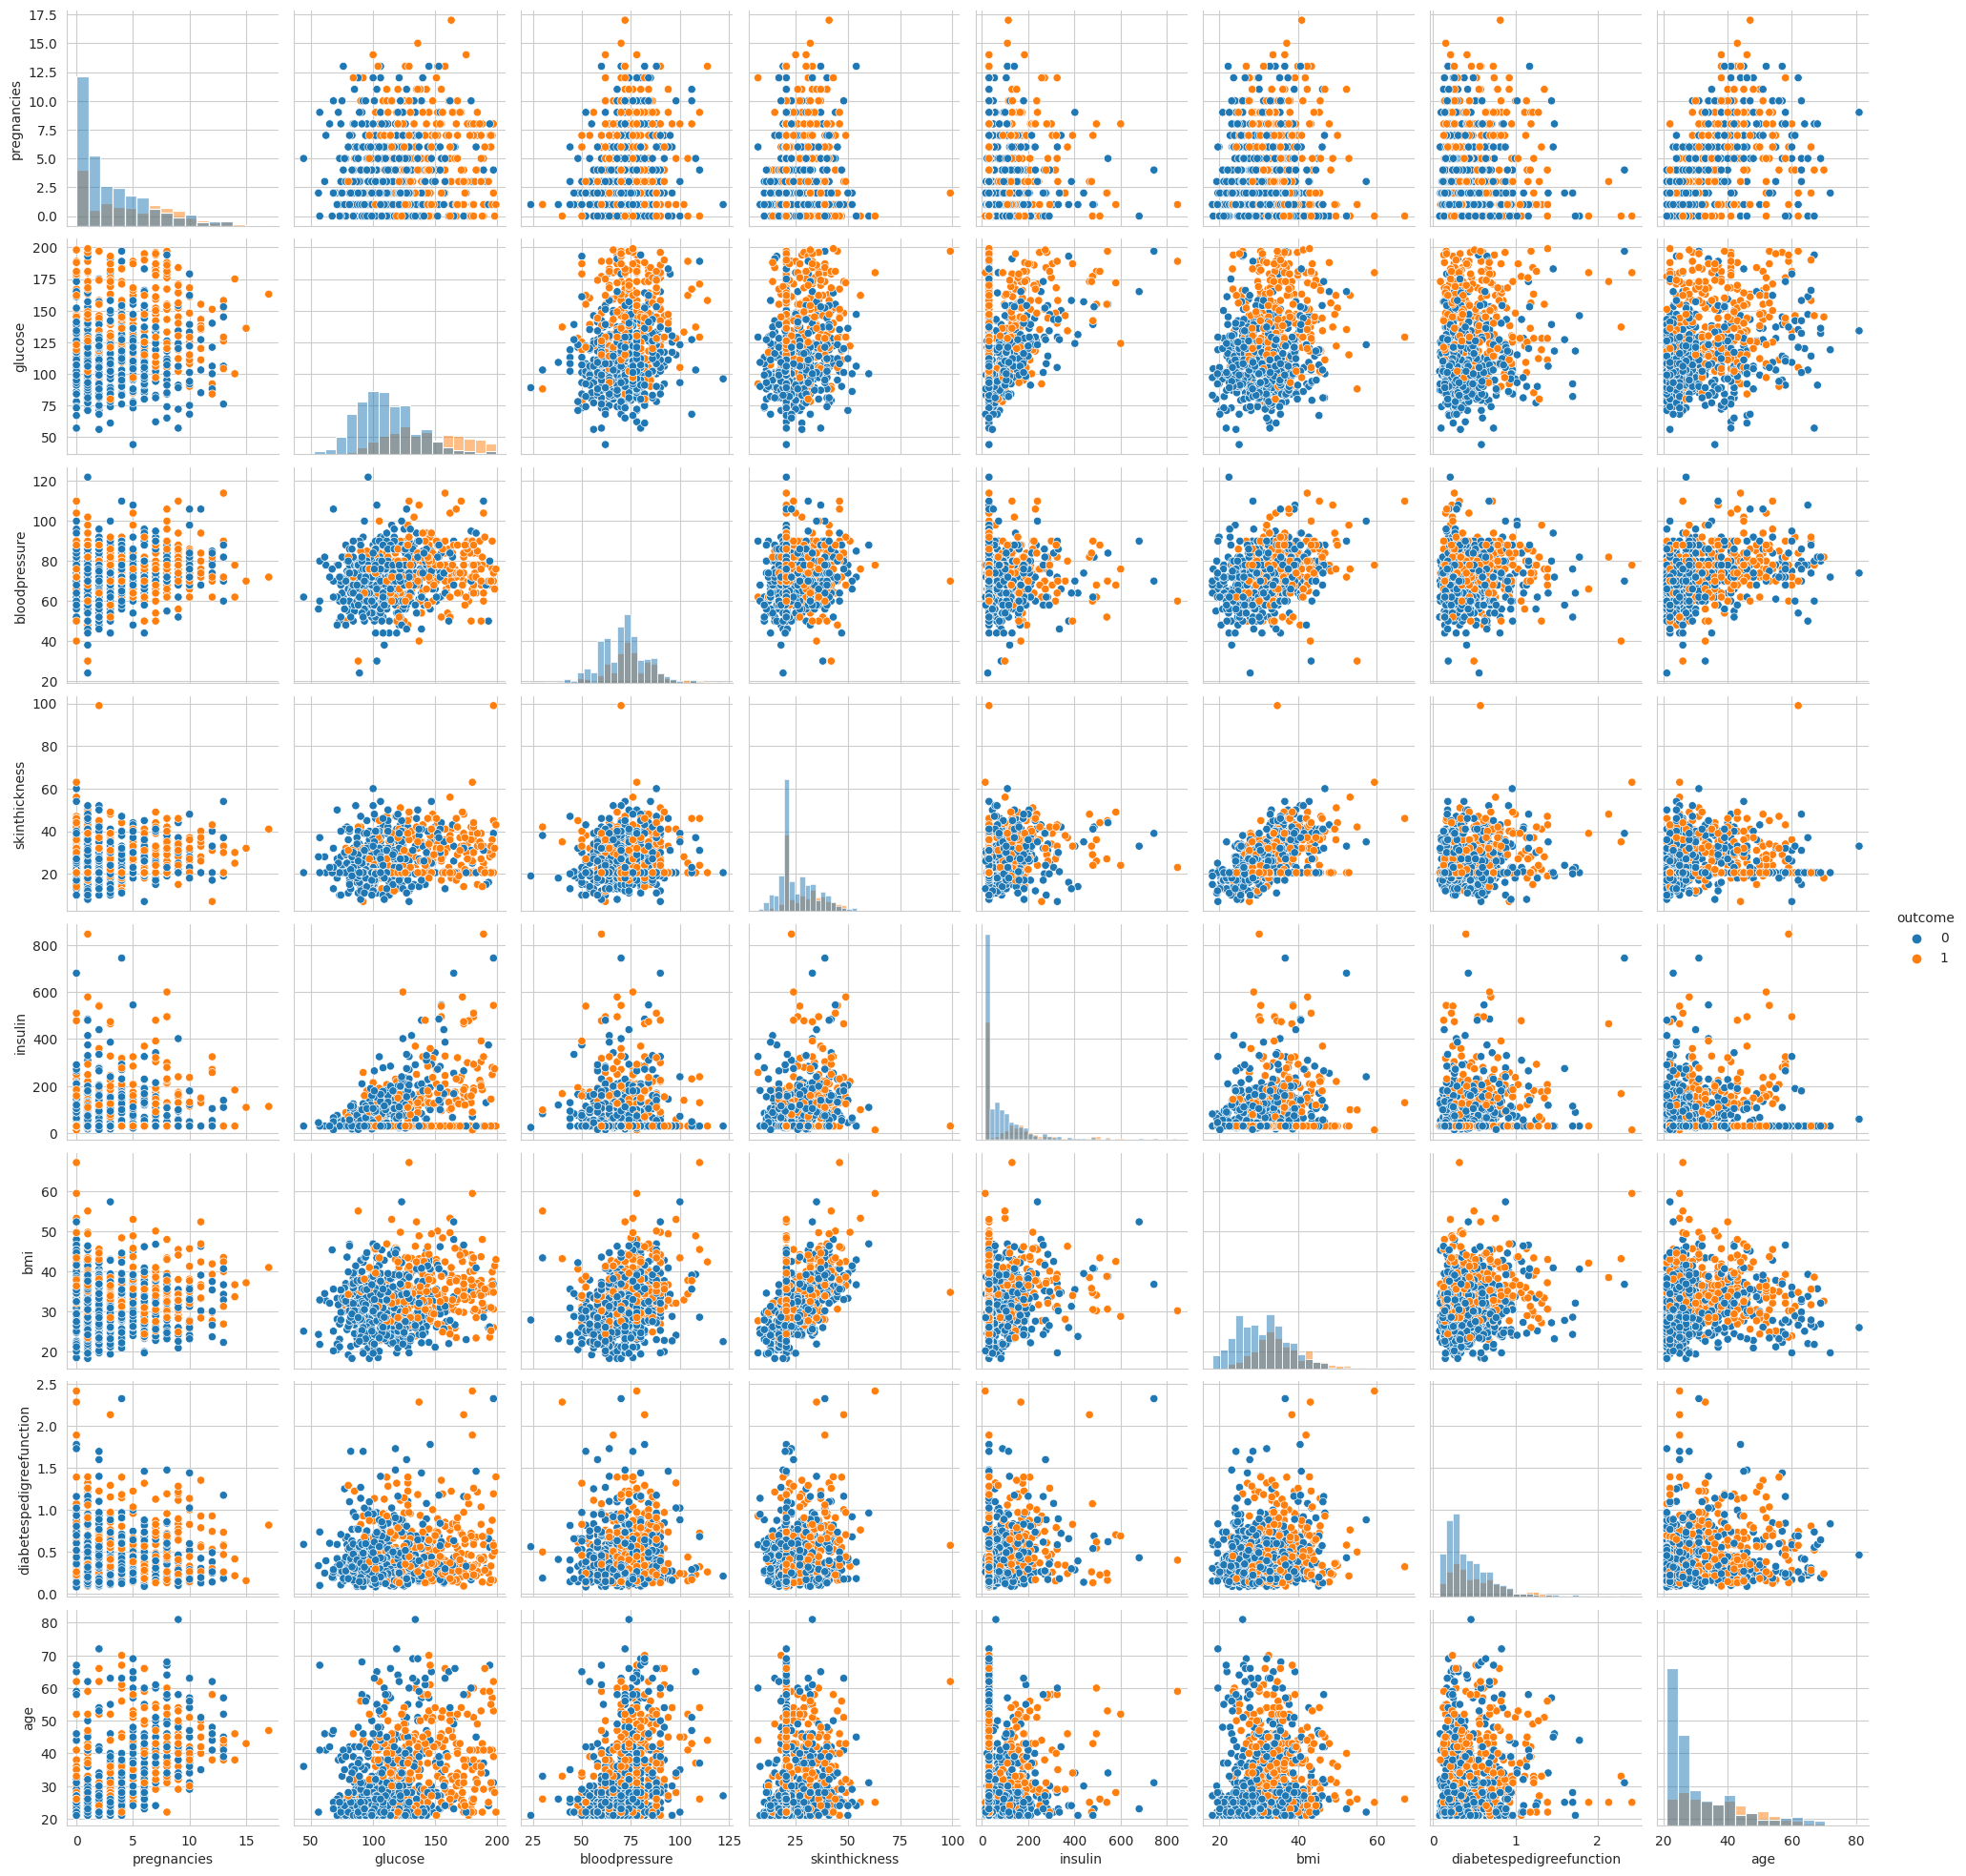

In [219]:
# view relationships between the variables
# scatter_matrix(frame = diabetes,figsize = (20,20),hue='outcome');
sns.pairplot(data=diabetes,hue='outcome',diag_kind='hist');

The above pairplot shows the relationships between a variable and each the remaining variables including itself. The colours of the scatter indicate the value of the outcome.
The following can be deduced from the diagram.
People with high glucose level, older people, people with higher BMI and Insulin level tend to have diabetes.
Skin thickness, blood pressure and diabetes pedigree function does not seem to affect diabetes.


In [220]:
# check the straight line on the skinthickness scatterplot
diabetes['skinthickness'].value_counts()

20.536458    227
32.000000     31
30.000000     27
27.000000     23
23.000000     22
33.000000     20
28.000000     20
18.000000     20
31.000000     19
19.000000     18
39.000000     18
29.000000     17
40.000000     16
25.000000     16
26.000000     16
22.000000     16
37.000000     16
41.000000     15
35.000000     15
36.000000     14
15.000000     14
17.000000     14
20.000000     13
24.000000     12
42.000000     11
13.000000     11
21.000000     10
46.000000      8
34.000000      8
12.000000      7
38.000000      7
11.000000      6
43.000000      6
16.000000      6
45.000000      6
14.000000      6
44.000000      5
10.000000      5
48.000000      4
47.000000      4
49.000000      3
50.000000      3
8.000000       2
7.000000       2
52.000000      2
54.000000      2
63.000000      1
60.000000      1
56.000000      1
51.000000      1
99.000000      1
Name: skinthickness, dtype: int64

<Axes: ylabel='age'>

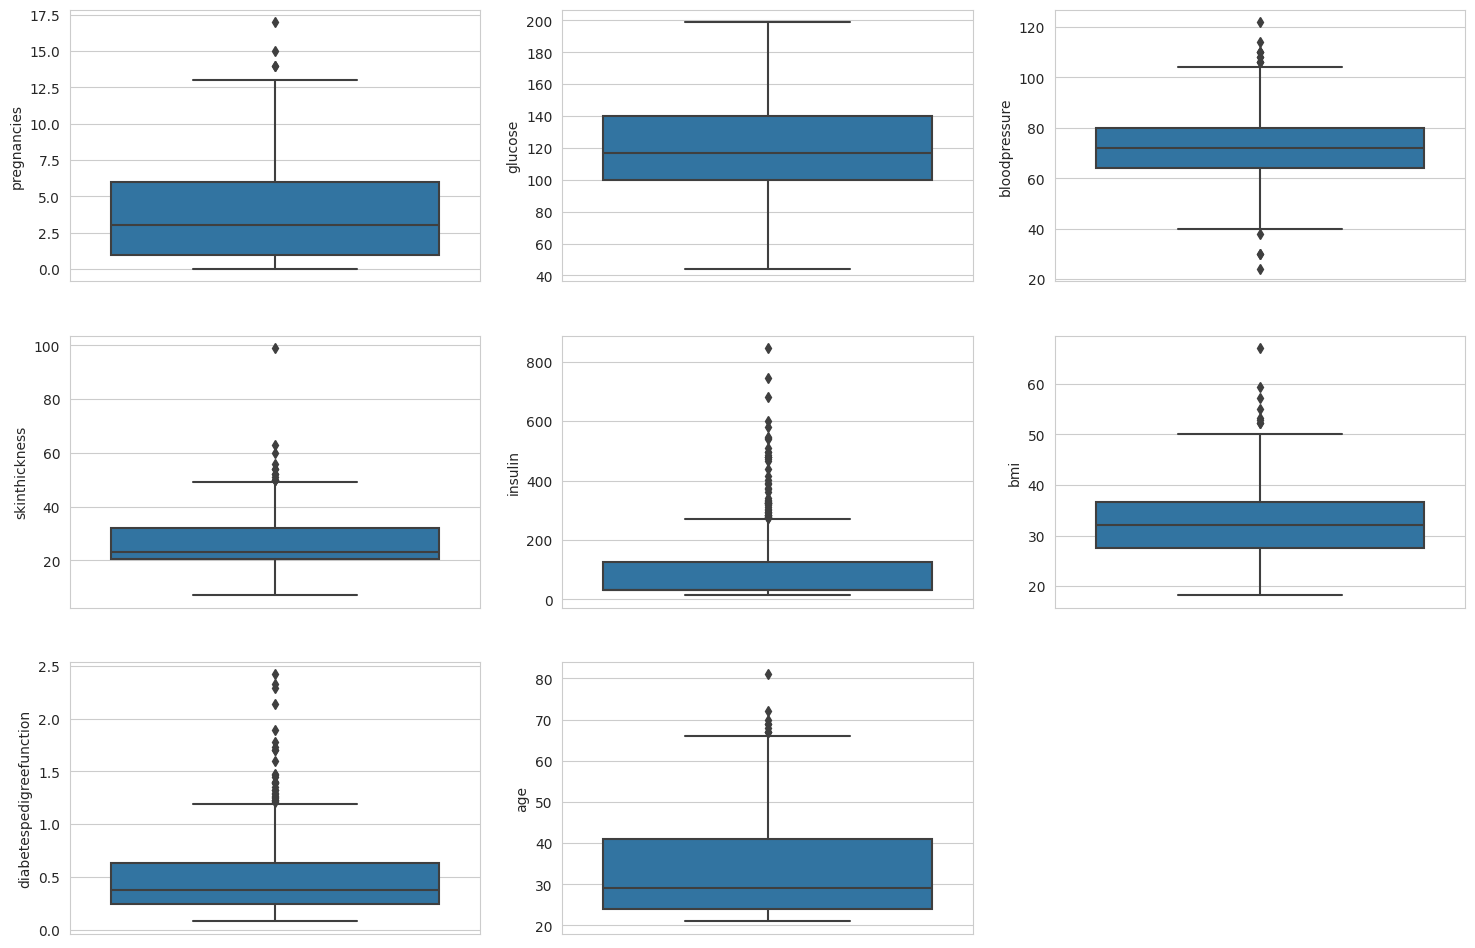

In [221]:
# check for outliers in the variables using boxplot
plt.figure(figsize=(18,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(data=diabetes, y='pregnancies')
plt.subplot(3,3,2)
sns.boxplot(data = diabetes, y = 'glucose')
plt.subplot(3,3,3)
sns.boxplot(data = diabetes, y = 'bloodpressure')
plt.subplot(3,3,4)
sns.boxplot(data = diabetes, y = 'skinthickness')
plt.subplot(3,3,5)
sns.boxplot(data = diabetes, y = 'insulin')
plt.subplot(3,3,6)
sns.boxplot(data = diabetes, y = 'bmi')
plt.subplot(3,3,7)
sns.boxplot(data = diabetes, y = 'diabetespedigreefunction')
plt.subplot(3,3,8)
sns.boxplot(data = diabetes, y = 'age')

The black dotted lines above the horizontal lines for each of the box plot are all outlier data point which will be taken care of below

In [222]:
# remove outliers
from scipy.stats import zscore

n_std = 3 # number of standard deviations
z_score = np.abs(zscore(diabetes))
outliers = (z_score>n_std).any(axis=1)
diabetes = diabetes[~outliers]

In [223]:
# check for correlation of the variables with outcome
corr = diabetes.corr()
corr['outcome'].sort_values(ascending=False)

outcome                     1.000000
glucose                     0.487730
bmi                         0.302992
age                         0.245544
pregnancies                 0.217706
diabetespedigreefunction    0.209408
bloodpressure               0.188612
skinthickness               0.147105
insulin                     0.119755
Name: outcome, dtype: float64

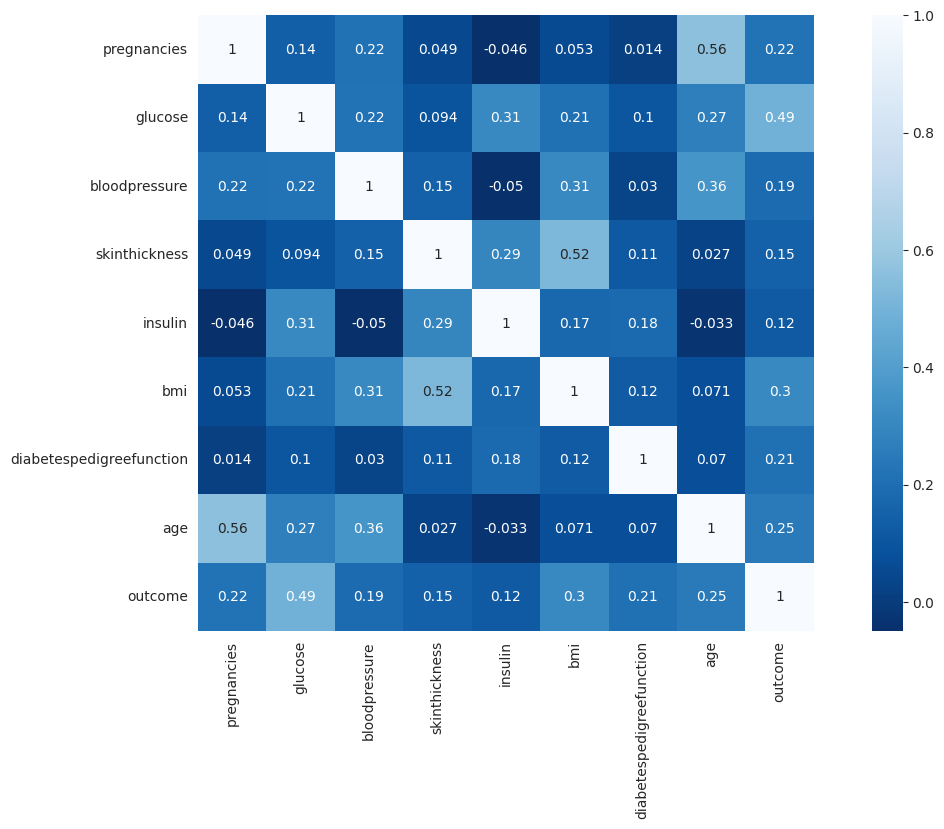

In [224]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr,annot=True,square=True,cmap='Blues_r');

The above is a heatmap showing the correlation of the variables to each other. Correlation is measured within the range -1 and 1, -1 is the strongest negative correlation, 1 is the strongest positive correlation and 0 means there no correlation.
For instance, age and pregnancies are highly correlated because the box at their intercept is 0.56, which is quite high relative to other correlation value.



In [225]:
# drop columns that have low correlation values
diabetes_new = diabetes.drop(['skinthickness','diabetespedigreefunction','bloodpressure','insulin'],axis='columns')

According to the dataset, some of the variables have very little contribution to the value of the outcome and is evident from their low correlation values with the outcome variable. They were dropped to reduce save time and resources. It will also improve accuracy


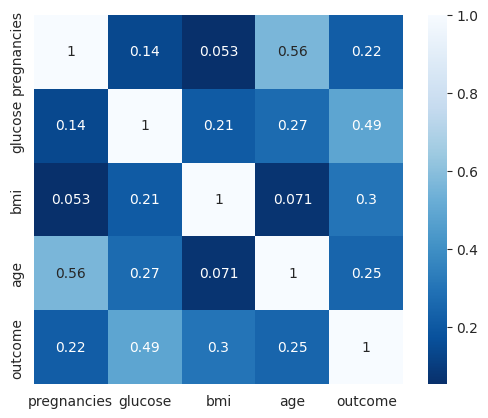

In [226]:
# checking for correlation among the remaining 5 variables
sns.heatmap(diabetes_new.corr(),annot=True,square=True,cmap='Blues_r');

In [227]:
# Also drop the age column due to high correlation with pregnancies column
diabetes_new.drop(columns=['age'],inplace =True)

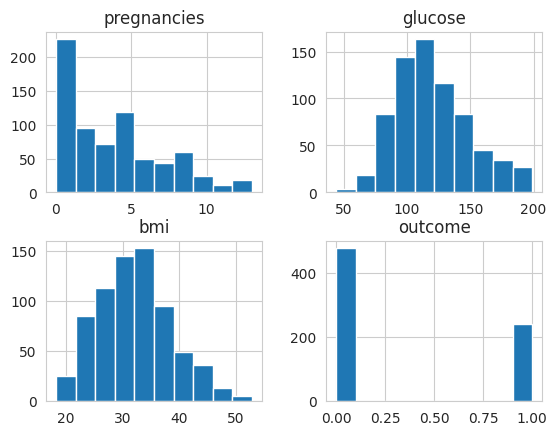

In [228]:
# check the distribution of the variables
diabetes_new.hist();

After removing outlier, the distribution of the variables is better, approaching uniform distribution.

In [229]:
diabetes_new.columns = ['pregnancies','glucose','bmi','outcome']

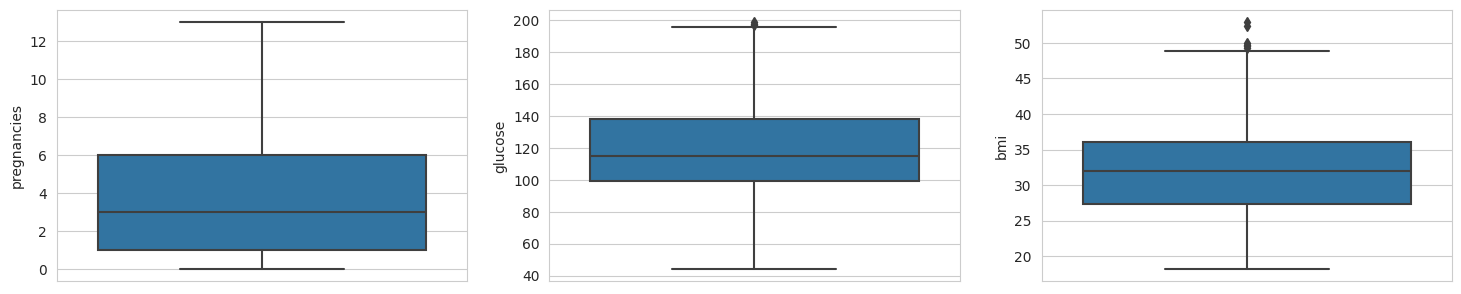

In [230]:
# check for outliers in the variables using boxplot

plt.figure(figsize = (18,12))
sns.set_style(style = 'whitegrid')
plt.subplot(3,3,1)
sns.boxplot(data = diabetes_new, y='pregnancies')
plt.subplot(3,3,2)
sns.boxplot(data = diabetes_new, y = 'glucose')
plt.subplot(3,3,3)
sns.boxplot(data = diabetes_new, y = 'bmi');


It is also obvious that we now have much less outlier in the dataset.

In [231]:
diabetes_new.sample(10)

,pregnancies,glucose,bmi,outcome
662,8,167.0,37.6,1
244,2,146.0,38.2,0
33,6,92.0,19.9,0
163,2,100.0,29.7,0
146,9,57.0,32.8,0
231,6,134.0,46.2,1
429,1,95.0,35.0,1
570,3,78.0,32.5,0
507,1,130.0,28.6,0
646,1,167.0,23.4,1


In [232]:
#split the dataset into independent and dependent variables
X,y = diabetes_new.iloc[:,:-1],diabetes_new.iloc[:,-1]

In [233]:
# split the rows into train and test dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [234]:
diabetes_new.sample(10)

,pregnancies,glucose,bmi,outcome
47,2,71.0,28.0,0
427,1,181.0,34.1,1
668,6,98.0,34.0,0
365,5,99.0,34.0,0
201,1,138.0,40.1,0
532,1,86.0,41.3,0
17,7,107.0,29.6,1
2,8,183.0,23.3,1
680,2,56.0,24.2,0
117,5,78.0,33.7,0


In [235]:
# scaling effect trial
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [236]:
# modelling #1 RandomForestClassifier

In [237]:
# create instance of the randomforestclassifier
model_rf = RandomForestClassifier(n_jobs=-1)
# train the model
# model_rf.fit(X_train,y_train)

In [ ]:
hyper_parameters = { 

     'n_estimators': [50,100, 200, 500], #the number of trees in the forest
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [1,2,4,5], #the minimum number of samples required to split an internal node
    'min_samples_leaf': [1,2,4,5], #the minimum number of samples required to be at a leaf node.
    'max_leaf_nodes': [4,10,20,50,None] # the maximum number of leaf nodes in a tree
}
grid_search = GridSearchCV(estimator=model_rf,param_grid=hyper_parameters,cv = 5,n_jobs=-1)
grid_search.fit(X_train,y_train)

In [239]:
print(f'Best score: {grid_search.best_score_}')
print(f'Best parameters: {grid_search.best_params_}')

Best score: 0.7547826086956522
Best parameters: {'criterion': 'entropy', 'max_leaf_nodes': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [240]:
# predict the outcome
y_predict = grid_search.predict(X_test)

In [241]:
# create the confusion matrix
cm_rf = confusion_matrix(y_test,y_predict)

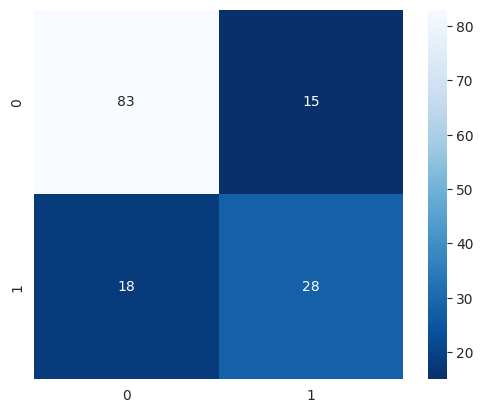

In [242]:
# show the confusion matrix on a heatmap
sns.heatmap(cm_rf,annot=True,square=True,cmap='Blues_r');

In [243]:
tn, fp, fn, tp = cm_rf.ravel()
print(f'accuracy is {(accuracy_score(y_test,y_predict)):.2f}')
print(f'Sensitivity is {(tp/(tp + fn)):.2f}')
print(f'Specificity is {(tn/(tn+fp)):.2f}')

accuracy is 0.77
Sensitivity is 0.61
Specificity is 0.85


In [244]:
#Logistic Regression
# create instance of the logisticregression
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression()

In [245]:
y_predict_test = model_lr.predict(X_train)
model_lr.score(X_train,y_predict_test)

1.0

In [246]:
y_predict_lr = model_lr.predict(X_test)

In [247]:
model_lr.score(X_test,y_predict_lr)

1.0

In [248]:
cm_lr = confusion_matrix(y_test,y_predict_lr)

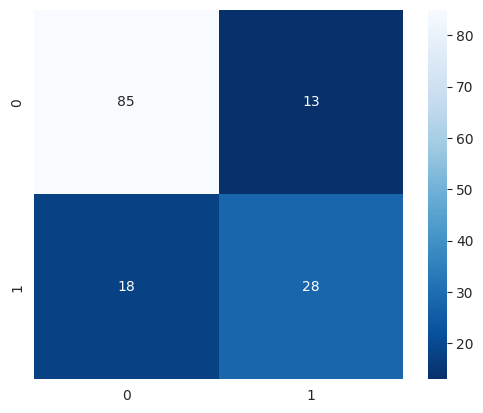

In [249]:
sns.heatmap(cm_lr,annot=True,square=True,cmap='Blues_r');

In [250]:
tn, fp, fn, tp = cm_lr.ravel()
print(f'accuracy is {(accuracy_score(y_test,y_predict)):.2f}')
print(f'Sensitivity is {(tp/(tp + fn)):.2f}')
print(f'Specificity is {(tn/(tn+fp)):.2f}')

accuracy is 0.77
Sensitivity is 0.61
Specificity is 0.87


In [251]:
from sklearn.model_selection import RepeatedStratifiedKFold
#KNN
# create instance of the kneighborsclassifier
model_knn = KNeighborsClassifier()
neighbors = list(range(10,25))
p=[1,2]
weights = ['uniform','distance']
# model_knn.fit(X_train,y_train)
metric = ['euclidean','manhattan','minkowski']
hyperparameters = dict(n_neighbors = neighbors,p = p,weights = weights,metric = metric)
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid_search = GridSearchCV(estimator=model_knn,param_grid=hyperparameters,cv=cv, scoring='f1',error_score=0)
model = grid_search.fit(X_train,y_train)

In [252]:
print('Best leaf_size:', model.best_estimator_.get_params()['leaf_size'])
print('Best p:', model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 1
Best n_neighbors: 13


In [253]:
y_predict = grid_search.predict(X_test)

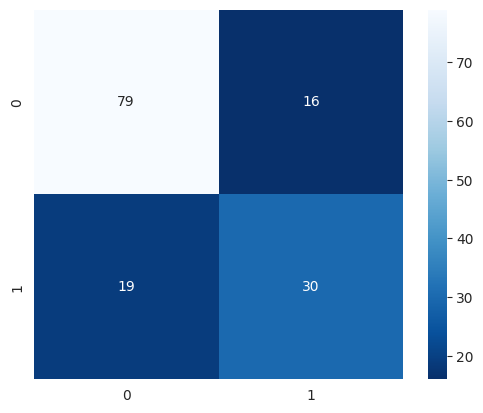

In [254]:
cm_knn = confusion_matrix(y_predict,y_test)
sns.heatmap(cm_knn,annot=True,square=True,cmap='Blues_r');

In [255]:
tn, fp, fn, tp = cm_knn.ravel()
print(f'accuracy is {(accuracy_score(y_test,y_predict)):.2f}')
print(f'Sensitivity is {(tp/(tp + fn)):.2f}')
print(f'Specificity is {(tn/(tn+fp)):.2f}')

accuracy is 0.76
Sensitivity is 0.61
Specificity is 0.83


In [256]:
# XGBoost

In [257]:
model_xgb = XGBClassifier()
parameter = {
    'max_depth':range(3,10,2), # the maximum depth of each decision tree
 'min_child_weight':range(1,6), # the minimum sum of weights of all the samples required in a child node
 'n_estimators':range(50,200,50), #number of decision trees to be built in the ensemble
 'learning_rate' :[i/10 for i in range(1,6)], # shrinkage rate for updating the weights of each tree
 
}
grid_search = GridSearchCV(estimator=model_xgb,param_grid=parameter)
grid_search.fit(X_train,y_train)
y_predict = grid_search.predict(X_test)

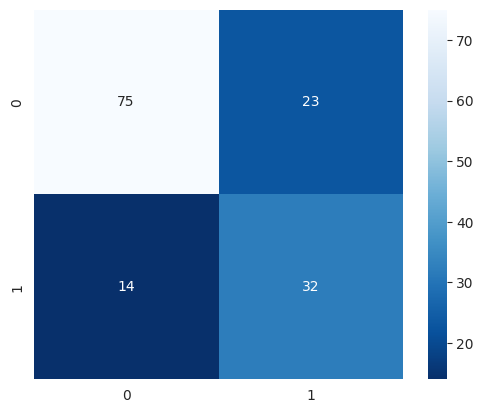

In [258]:
cm_xgb = confusion_matrix(y_test,y_predict)
sns.heatmap(cm_xgb,annot=True,square=True,cmap='Blues_r');

In [259]:
tn, fp, fn, tp = cm_xgb.ravel()
print(f'accuracy is {(accuracy_score(y_test,y_predict)):.2f}')
print(f'Sensitivity is {(tp/(tp + fn)):.2f}')
print(f'Specificity is {(tn/(tn+fp)):.2f}')

accuracy is 0.74
Sensitivity is 0.70
Specificity is 0.77
